## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()
telco_data = pd.read_csv("../data/Telecom-Churn.csv",index_col=0)
telco_data.drop(columns=["CustomerID"], inplace=True)
telco_data["SeniorCitizen"] = telco_data["SeniorCitizen"].map({0: "No", 1: "Yes"})
telco_data.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [2]:
telco_data.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7017.000000,7032.000000
mean,32.371149,64.707482,2283.300441
std,24.559481,30.105503,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.400000,401.450000
50%,29.000000,70.300000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [3]:
telco_data["Tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
     ... 
20     71
62     70
41     70
53     70
32     69
54     68
47     68
50     68
51     68
58     67
49     66
43     65
42     65
31     65
34     65
37     65
57     65
55     64
40     64
48     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: Tenure, Length: 73, dtype: int64

C:\Users\Zuzula\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


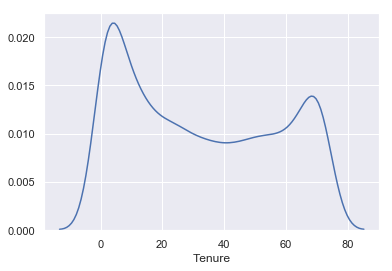

In [4]:
g = sns.distplot(telco_data["Tenure"].dropna(), kde=True, hist=False)

In [5]:
telco_data["MonthlyCharges"].value_counts()

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
19.70     43
20.00     43
20.15     40
19.55     40
19.75     39
20.25     39
20.35     38
19.80     38
20.10     37
19.60     37
20.20     35
19.50     32
19.40     31
20.45     31
20.40     30
19.45     28
20.50     28
20.30     28
20.55     27
19.35     25
19.30     24
20.65     23
25.25     20
25.10     19
19.25     18
          ..
38.25      1
56.85      1
48.15      1
57.65      1
34.50      1
113.40     1
51.60      1
66.35      1
112.60     1
107.00     1
62.30      1
108.60     1
67.60      1
110.70     1
28.60      1
53.70      1
21.30      1
29.40      1
73.10      1
39.55      1
18.40      1
103.60     1
29.10      1
33.75      1
114.75     1
57.80      1
107.65     1
34.55      1
81.65      1
28.50      1
Name: MonthlyCharges, Length: 1583, dtype: int64

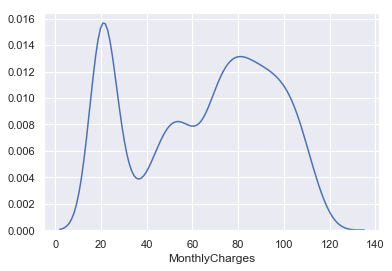

In [6]:
g = sns.distplot(telco_data["MonthlyCharges"].dropna(), kde=True, hist=False)

In [7]:
telco_data["TotalCharges"].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
45.30       7
19.55       7
19.45       6
20.15       6
20.25       6
20.30       5
20.45       5
69.95       4
69.90       4
19.85       4
69.60       4
44.40       4
69.65       4
19.50       4
19.20       4
19.95       4
49.90       4
20.50       4
20.35       4
70.60       4
44.00       4
50.15       4
19.40       4
75.30       4
74.70       4
           ..
1971.15     1
1793.25     1
1212.85     1
1504.05     1
1319.95     1
572.20      1
5958.85     1
1673.80     1
958.15      1
7610.10     1
92.05       1
2666.75     1
1001.50     1
7262.00     1
4740.00     1
96.45       1
4483.95     1
5574.75     1
44.65       1
2688.45     1
1374.35     1
3107.30     1
248.95      1
607.30      1
1534.05     1
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

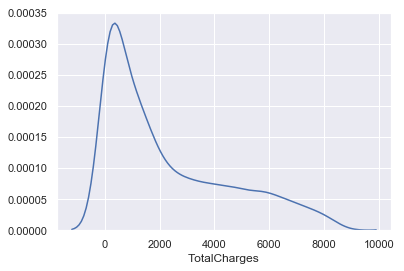

In [8]:
g = sns.distplot(telco_data["TotalCharges"].dropna(), kde=True, hist=False)

In [9]:
telco_data["Gender"].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

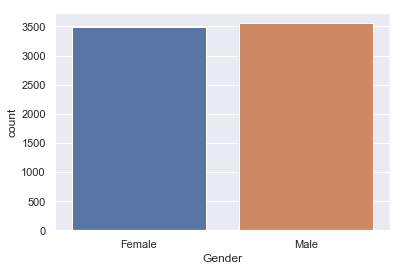

In [10]:
g = sns.countplot(x="Gender", data=telco_data)

In [11]:
telco_data["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

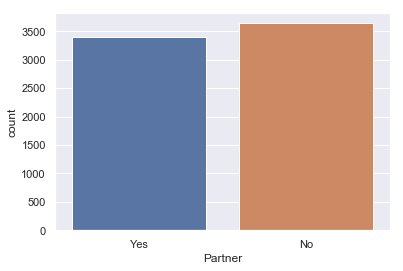

In [12]:
g = sns.countplot(x="Partner", data=telco_data)

In [13]:
telco_data["Dependents"].value_counts()

No     4921
Yes    2102
Name: Dependents, dtype: int64

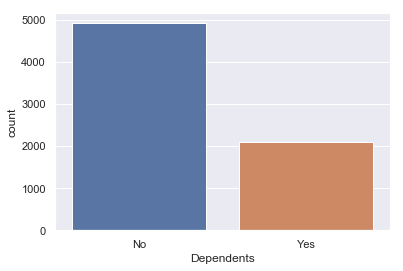

In [14]:
g = sns.countplot(x="Dependents", data=telco_data)

In [2]:
l=list(telco_data.columns.values)
for i in range(len(l)):
    print("Atribút: " + l[i] + "\tPočet chýbajúcich hodnôt: " +  str(telco_data[l[i]].isna().sum()) )

Atribút: Gender	Počet chýbajúcich hodnôt: 0
Atribút: SeniorCitizen	Počet chýbajúcich hodnôt: 0
Atribút: Partner	Počet chýbajúcich hodnôt: 0
Atribút: Dependents	Počet chýbajúcich hodnôt: 20
Atribút: Tenure	Počet chýbajúcich hodnôt: 0
Atribút: PhoneService	Počet chýbajúcich hodnôt: 0
Atribút: MultipleLines	Počet chýbajúcich hodnôt: 0
Atribút: InternetService	Počet chýbajúcich hodnôt: 0
Atribút: OnlineSecurity	Počet chýbajúcich hodnôt: 0
Atribút: OnlineBackup	Počet chýbajúcich hodnôt: 0
Atribút: DeviceProtection	Počet chýbajúcich hodnôt: 0
Atribút: TechSupport	Počet chýbajúcich hodnôt: 0
Atribút: StreamingTV	Počet chýbajúcich hodnôt: 0
Atribút: StreamingMovies	Počet chýbajúcich hodnôt: 0
Atribút: Contract	Počet chýbajúcich hodnôt: 0
Atribút: PaperlessBilling	Počet chýbajúcich hodnôt: 0
Atribút: PaymentMethod	Počet chýbajúcich hodnôt: 0
Atribút: MonthlyCharges	Počet chýbajúcich hodnôt: 26
Atribút: TotalCharges	Počet chýbajúcich hodnôt: 11
Atribút: Churn	Počet chýbajúcich hodnôt: 0


### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [16]:
corr_table = telco_data.corr()
corr_table

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247732,0.825880
MonthlyCharges,0.247732,1.000000,0.651316
TotalCharges,0.825880,0.651316,1.000000


In [ ]:
#Najviac su korelované atribúty TotalCharges a Tenure (korelačný koeoficient = 0.825880)

C:\Users\Zuzula\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Zuzula\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


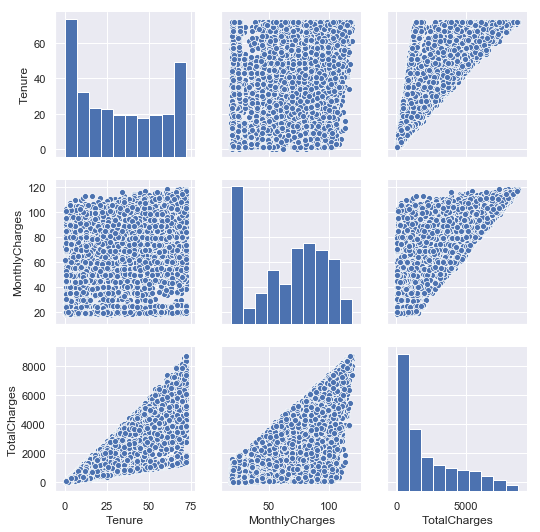

In [17]:
p = sns.pairplot(telco_data)

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [3]:
telco_data["MonthlyCharges_ordinal"] = pd.cut(telco_data["MonthlyCharges"], 5, labels=["very low", "low", "medium", "high", "very high"])
telco_data["MonthlyCharges_ordinal"].value_counts()

high         1817
very low     1797
medium       1361
very high    1042
low          1000
Name: MonthlyCharges_ordinal, dtype: int64

In [4]:
telco_data["TotalCharges_ordinal"] = pd.cut(telco_data["TotalCharges"], 5,labels=["very low", "low", "medium", "high", "very high"])
telco_data["TotalCharges_ordinal"].value_counts()

very low     3937
low          1179
medium        866
high          705
very high     345
Name: TotalCharges_ordinal, dtype: int64

In [6]:
telco_data["Tenure_ordinal"] = pd.qcut(telco_data["Tenure"], 5, labels=["newbie", "recent", "not-so-recent", "old","very old"])
telco_data["Tenure_ordinal"].value_counts()

newbie           1481
not-so-recent    1408
very old         1407
recent           1397
old              1350
Name: Tenure_ordinal, dtype: int64

In [7]:
telco_data.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,very low,very low,newbie
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,low,low,not-so-recent
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,low,very low,newbie
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,low,low,old
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,medium,very low,newbie


### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [8]:
telco_data["Churn"] = telco_data["Churn"].map({"Yes": 1, "No": 0})
pd.pivot_table(telco_data, index="Tenure_ordinal", values="Churn")

,Churn
Tenure_ordinal,
newbie,0.529372
recent,0.334288
not-so-recent,0.223722
old,0.155556
very old,0.066098


In [25]:
#Z tabulky vidno, ze najviac odchadzaju zakaznici, ktori su u operatora len kratko (NEWBIE)

In [23]:
pd.pivot_table(telco_data, index="MonthlyCharges_ordinal", values="Churn")

,Churn
MonthlyCharges_ordinal,
very low,0.114079
low,0.269000
medium,0.295371
high,0.369840
very high,0.301344


In [ ]:
#Z tabulky vidno, ze najviac odchadzaju zakaznici, ktori maju vysoke mesacne platby (HIGH)

In [24]:
pd.pivot_table(telco_data, index="TotalCharges_ordinal", values="Churn")

,Churn
TotalCharges_ordinal,
very low,0.328931
low,0.246819
medium,0.163972
high,0.147518
very high,0.107246


In [ ]:
#Z tabulky vidno, ze najviac odchadzaju zakaznici, ktorych celkove poplatky boli dosial najnizsie (VERY LOW)
#Poznamka: Toto koresponduje s faktom, ze najviac odchadzaju zakaznici, ktori boli u operatora len kratko 
#a teda ich celkove poplatky boli dosial len velmi nizke

In [25]:
pd.pivot_table(telco_data, index=["Tenure_ordinal","MonthlyCharges_ordinal","TotalCharges_ordinal"], values="Churn")
#pd.pivot_table(telco_data, index=["Tenure_ordinal","MonthlyCharges_ordinal","TotalCharges_ordinal"], values="Churn", aggfunc="count")

Churn
Tenure_ordinal MonthlyCharges_ordinal TotalCharges_ordinal          
newbie         very low               very low              0.307522
               low                    very low              0.496970
               medium                 very low              0.649275
               high                   very low              0.744337
               very high              very low              0.833333
recent         very low               very low              0.105000
               low                    very low              0.237668
               medium                 very low              0.315113
               high                   very low              0.571839
                                      low                   0.565217
               very high              very low              0.728571
                                      low                   0.533333
not-so-recent  very low               very low              0.037143
               low                    very low              0.143750
                                      low                   0.162791
               medium                 very low              0.217391
                                      low                   0.188482
               high                   very low              0.300000
                                      low                   0.352332
                                      medium                0.285714
               very high              low                   0.467290
                                      medium                0.362319
old            very low               very low              0.033557
                                      low                   0.000000
               low                    very low              0.000000
                                      low                   0.120805
               medium                 low                   0.134921
                                      medium                0.060870
               high                   low                   0.166667
                                      medium                0.184669
                                      high                  0.204082
               very high              medium                0.346457
                                      high                  0.282353
                                      very high             0.000000
very old       very low               very low              0.004566
                                      low                   0.000000
               low                    low                   0.040816
                                      medium                0.047619
               medium                 medium                0.023392
                                      high                  0.032258
               high                   medium                0.032258
                                      high                  0.057402
                                      very high             0.000000
               very high              high                  0.216667
                                      very high             0.111111

In [ ]:
#Z tejto tabulky vidno, ze najviac odchadzaju zakaznici, ktori
# - boli u operatora len velmi kratko (NEWBIE), ale platili mesacne vysoke alebo velmi vysoke poplatky
# - boli u operatra pomerne kratko (RECENT), ale platili velmi vysoke mesacne poplatky
#Toto je možné vizualizovať pomocou heatmapy (kedze atribut TotalCharges koreluje s atributom MonthlyCharges, do heatmapy 
#boli pouzite len odvodene diskretizovane atributy Tenure_ordinal a MonthlyCharges):

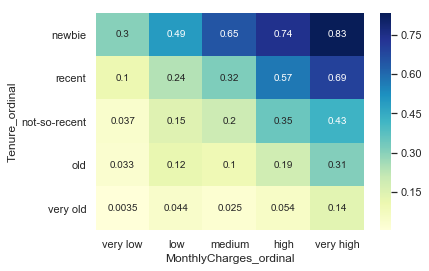

In [26]:
heatmap_data = pd.pivot_table(telco_data, index="Tenure_ordinal", values="Churn", columns="MonthlyCharges_ordinal")
g = sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu",  cbar=True) 

In [27]:
pd.pivot_table(telco_data, index="Gender", values="Churn")

,Churn
Gender,
Female,0.269209
Male,0.261603


In [ ]:
#Pohlavie nema vplyv na to, ci zakaznik odide alebo nie

In [28]:
pd.pivot_table(telco_data, index="SeniorCitizen", values="Churn")

,Churn
SeniorCitizen,
No,0.236062
Yes,0.416813


In [ ]:
#Je vacsia sanca odchodu u seniorov (mozno trochu drasticke - ale je to odchod alebo umrtie zakaznika???)

In [29]:
pd.pivot_table(telco_data, index=["Gender","SeniorCitizen"], values="Churn")

Churn
Gender SeniorCitizen          
Female No             0.239384
       Yes            0.422535
Male   No             0.232808
       Yes            0.411150

In [ ]:
#Potvrdzuje sa predosly fakt, len upresnenie, ze skor odidu zeny v seniorskom veku ako muzi, ale ten rozdiel je minimalny

In [30]:
pd.crosstab([telco_data["PhoneService"]],[telco_data["InternetService"],telco_data["StreamingTV"],telco_data["StreamingMovies"]] )

InternetService  DSL                Fiber optic                  \
StreamingTV       No       Yes               No       Yes         
StreamingMovies   No  Yes   No  Yes          No  Yes   No   Yes   
PhoneService                                                      
No               299   98   85  200           0    0    0     0   
Yes              814  253  242  430         905  441  440  1310   

InternetService                  No  
StreamingTV     No internet service  
StreamingMovies No internet service  
PhoneService                         
No                                0  
Yes                            1526

In [ ]:
#Z tabulky vidno, ze zakaznici su v troch velkych skupinach:
# - zakaznici, ktori vyuzivaju len telefon na telefonovanie (1526)
# - zakaznici, ktori vyuzovaju len telefonnu pripojku na internet DSL, ale nie telefonovanie
# - zakaznici, ktori vyuzivaju aj telefonovanie, aj DSL alebo opticky internet, pricom mozu ale nemusia vyuzivat streamovanie

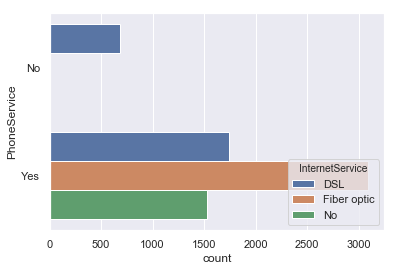

In [31]:
g = sns.countplot(y="PhoneService", hue="InternetService", data=telco_data)

In [ ]:
#Grafy jednotlivych pocetnosti:

C:\Users\Zuzula\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


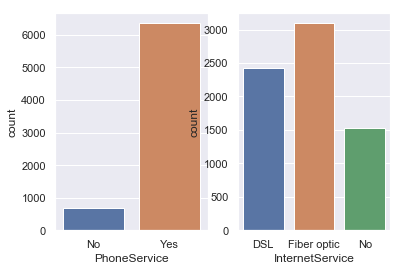

In [32]:
fig, ax =plt.subplots(1,2)
g = sns.countplot(x="PhoneService", data=telco_data, ax=ax[0])
g = sns.countplot(x="InternetService", data=telco_data, ax=ax[1])
fig.show()

C:\Users\Zuzula\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


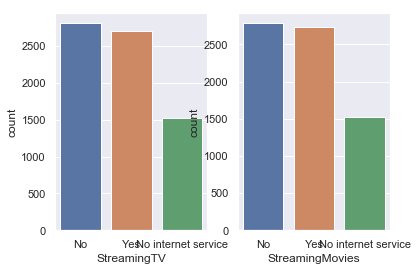

In [33]:
fig, ax =plt.subplots(1,2)
g = sns.countplot(x="StreamingTV", data=telco_data, ax=ax[0])
g = sns.countplot(x="StreamingMovies", data=telco_data, ax=ax[1])
fig.show()

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [9]:
ptable=pd.pivot_table(telco_data, index="Tenure_ordinal", values="TotalCharges", aggfunc="mean")
print(ptable)

                TotalCharges
Tenure_ordinal              
newbie            143.637347
recent            769.433465
not-so-recent    1939.030114
old              3519.086222
very old         5180.669829


In [10]:
def replace_missing_tc(row):
    t_charges = row["TotalCharges"]
    ten_ord = row["Tenure_ordinal"]
    if pd.isna(t_charges):
        return ptable["TotalCharges"][ten_ord]
    else:
        return t_charges

telco_data["TotalCharges"] = telco_data.apply(replace_missing_tc, axis=1)
telco_data["TotalCharges"].isna().sum()

0

In [11]:
def replace_missing_mcharges(row):
    t_charges = row["TotalCharges"]
    ten = row["Tenure"]
    m_charges = row["MonthlyCharges"]
    if pd.isna(m_charges):
        return t_charges/ten
    else:
        return m_charges

telco_data["MonthlyCharges"] = telco_data.apply(replace_missing_mcharges, axis=1)
telco_data["MonthlyCharges"].isna().sum()

0

In [12]:
ctable = pd.crosstab(telco_data["Dependents"], [telco_data["Partner"],telco_data["Gender"]])
print(ctable)

Partner        No          Yes     
Gender     Female  Male Female Male
Dependents                         
No           1646  1624    804  847
Yes           144   214    880  864


In [ ]:
#Vidime, ze atribut Gender prakticky neovplyvnuje to, ci dotycny ma alebo nema deti
#Preto na urcenie atribute Dependents bude pouzity len atribut Partner

In [13]:
def replace_missing_dependents(row):
    dependents = row["Dependents"]
    gender = row["Gender"]
    partner = row["Partner"]
    if pd.isna(dependents):
        if partner=="Yes":
            return "Yes"
        else:
            return "No"
    else:
        return dependents

telco_data["Dependents"] = telco_data.apply(replace_missing_dependents, axis=1)
telco_data["Dependents"].isna().sum()

0

In [14]:
#Skontrolujeme, ci nemame v datasete chybajuce hodnoty:
l=list(telco_data.columns.values)
for i in range(len(l)):
    print("Atribút: " + l[i] + "\tPočet chýbajúcich hodnôt: " +  str(telco_data[l[i]].isna().sum()) )

Atribút: Gender	Počet chýbajúcich hodnôt: 0
Atribút: SeniorCitizen	Počet chýbajúcich hodnôt: 0
Atribút: Partner	Počet chýbajúcich hodnôt: 0
Atribút: Dependents	Počet chýbajúcich hodnôt: 0
Atribút: Tenure	Počet chýbajúcich hodnôt: 0
Atribút: PhoneService	Počet chýbajúcich hodnôt: 0
Atribút: MultipleLines	Počet chýbajúcich hodnôt: 0
Atribút: InternetService	Počet chýbajúcich hodnôt: 0
Atribút: OnlineSecurity	Počet chýbajúcich hodnôt: 0
Atribút: OnlineBackup	Počet chýbajúcich hodnôt: 0
Atribút: DeviceProtection	Počet chýbajúcich hodnôt: 0
Atribút: TechSupport	Počet chýbajúcich hodnôt: 0
Atribút: StreamingTV	Počet chýbajúcich hodnôt: 0
Atribút: StreamingMovies	Počet chýbajúcich hodnôt: 0
Atribút: Contract	Počet chýbajúcich hodnôt: 0
Atribút: PaperlessBilling	Počet chýbajúcich hodnôt: 0
Atribút: PaymentMethod	Počet chýbajúcich hodnôt: 0
Atribút: MonthlyCharges	Počet chýbajúcich hodnôt: 0
Atribút: TotalCharges	Počet chýbajúcich hodnôt: 0
Atribút: Churn	Počet chýbajúcich hodnôt: 0
Atribút: Mo

In [15]:
#Vidime, ze po po doplneni chybajucich hodnot povodnym atributom treba este doplnit hodnoty novym atributom,
#ktore vznikli po diskretizacii, co urobime novym prerozdelenim intervalov na zaklade doplnenych hodnot povodnych atributov:
telco_data["MonthlyCharges_ordinal"] = pd.cut(telco_data["MonthlyCharges"], 5, labels=["very low", "low", "medium", "high", "very high"])
telco_data["TotalCharges_ordinal"] = pd.cut(telco_data["TotalCharges"], 5,labels=["very low", "low", "medium", "high", "very high"])
telco_data["Tenure_ordinal"] = pd.qcut(telco_data["Tenure"], 5, labels=["newbie", "recent", "not-so-recent", "old","very old"])

In [16]:
#A posledna kontrola:
l=list(telco_data.columns.values)
for i in range(len(l)):
    print("Atribút: " + l[i] + "\tPočet chýbajúcich hodnôt: " +  str(telco_data[l[i]].isna().sum()) )

Atribút: Gender	Počet chýbajúcich hodnôt: 0
Atribút: SeniorCitizen	Počet chýbajúcich hodnôt: 0
Atribút: Partner	Počet chýbajúcich hodnôt: 0
Atribút: Dependents	Počet chýbajúcich hodnôt: 0
Atribút: Tenure	Počet chýbajúcich hodnôt: 0
Atribút: PhoneService	Počet chýbajúcich hodnôt: 0
Atribút: MultipleLines	Počet chýbajúcich hodnôt: 0
Atribút: InternetService	Počet chýbajúcich hodnôt: 0
Atribút: OnlineSecurity	Počet chýbajúcich hodnôt: 0
Atribút: OnlineBackup	Počet chýbajúcich hodnôt: 0
Atribút: DeviceProtection	Počet chýbajúcich hodnôt: 0
Atribút: TechSupport	Počet chýbajúcich hodnôt: 0
Atribút: StreamingTV	Počet chýbajúcich hodnôt: 0
Atribút: StreamingMovies	Počet chýbajúcich hodnôt: 0
Atribút: Contract	Počet chýbajúcich hodnôt: 0
Atribút: PaperlessBilling	Počet chýbajúcich hodnôt: 0
Atribút: PaymentMethod	Počet chýbajúcich hodnôt: 0
Atribút: MonthlyCharges	Počet chýbajúcich hodnôt: 0
Atribút: TotalCharges	Počet chýbajúcich hodnôt: 0
Atribút: Churn	Počet chýbajúcich hodnôt: 0
Atribút: Mo

In [ ]:
#Super!

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [17]:
telco_data["TotalMonthCharges"] = telco_data["MonthlyCharges"]*telco_data["Tenure"]

telco_data["TotalRatio"]=telco_data.eval(0)

def calculate_TR(row):
    tmc = row["TotalMonthCharges"]
    tc = row["TotalCharges"]
    if tmc<tc:
        return -1
    elif tmc==tc:
        return 0
    else:
        return 1

telco_data["TotalRatio"] = telco_data.apply(calculate_TR, axis=1)

pd.set_option("display.max_columns",50)
telco_data.head(5)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,very low,very low,newbie,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,low,low,not-so-recent,1936.30,1
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,low,very low,newbie,107.70,-1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,low,low,old,1903.50,1
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,medium,very low,newbie,141.40,-1


In [18]:
telco_data.to_csv("../data/telco_data_full.csv", index=False)

### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [19]:
telco_data = pd.read_csv("../data/telco_data_full.csv")
telco_data.head(20)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,very low,very low,newbie,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,low,low,not-so-recent,1936.30,1
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,low,very low,newbie,107.70,-1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,low,low,old,1903.50,1
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,medium,very low,newbie,141.40,-1
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,very high,very low,recent,797.20,-1
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,high,low,not-so-recent,1960.20,1
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,very low,very low,recent,297.50,-1
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,very high,low,not-so-recent,2934.40,-1
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,low,medium,very old,3481.30,-1


In [20]:
telco_data["Gender"] = telco_data["Gender"].map({"Male": 0, "Female": 1})
telco_data["SeniorCitizen"] = telco_data["SeniorCitizen"].map({"No": 0, "Yes": 1})
telco_data["Partner"] = telco_data["Partner"].map({"No": 0, "Yes": 1})
telco_data["Dependents"] = telco_data["Dependents"].map({"No": 0, "Yes": 1})
telco_data["PhoneService"] = telco_data["PhoneService"].map({"No": 0, "Yes": 1}) 
telco_data["PaperlessBilling"] = telco_data["PaperlessBilling"].map({"No": 0, "Yes": 1})
telco_data["MultipleLines"] = telco_data["MultipleLines"].map({"No phone service": 0, "No": 1, "Yes" : 2})
telco_data["InternetService"] = telco_data["InternetService"].map({"No": 0, "DSL": 1, "Fiber optic" : 2})
telco_data["OnlineSecurity"] = telco_data["OnlineSecurity"].map({"No internet service": 0, "No": 1, "Yes" : 2})
telco_data["OnlineBackup"] = telco_data["OnlineBackup"].map({"No internet service": 0, "No": 1, "Yes" : 2})
telco_data["DeviceProtection"] = telco_data["DeviceProtection"].map({"No internet service": 0, "No": 1, "Yes" : 2})
telco_data["TechSupport"] = telco_data["TechSupport"].map({"No internet service": 0, "No": 1, "Yes" : 2})
telco_data["StreamingTV"] = telco_data["StreamingTV"].map({"No internet service": 0, "No": 1, "Yes" : 2})
telco_data["StreamingMovies"] = telco_data["StreamingMovies"].map({"No internet service": 0, "No": 1, "Yes" : 2})
telco_data["Contract"] = telco_data["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year" : 2})
telco_data["Tenure_ordinal"] = telco_data["Tenure_ordinal"].map({"newbie": 0, "recent": 1, "not-so-recent": 2, "old" : 3, "very old" : 4})
telco_data["MonthlyCharges_ordinal"] = telco_data["MonthlyCharges_ordinal"].map({"very low": 0, "low" : 1, "medium" : 2, "high" : 3, "very high" : 4})
telco_data["TotalCharges_ordinal"] = telco_data["TotalCharges_ordinal"].map({"very low": 0, "low" : 1, "medium" : 2, "high" : 3, "very high" : 4})

telco_data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,1,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,Electronic check,29.85,29.85,0,0,0,0,29.85,0
1,0,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,Mailed check,56.95,1889.50,0,1,1,2,1936.30,1
2,0,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,Mailed check,53.85,108.15,1,1,0,0,107.70,-1
3,0,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,Bank transfer (automatic),42.30,1840.75,0,1,1,3,1903.50,1
4,1,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,Electronic check,70.70,151.65,1,2,0,0,141.40,-1


In [21]:
telco_data = pd.get_dummies(telco_data, columns=["PaymentMethod"]) 
telco_data.head() 

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,29.85,29.85,0,0,0,0,29.85,0,0,0,1,0
1,0,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,56.95,1889.50,0,1,1,2,1936.30,1,0,0,0,1
2,0,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,53.85,108.15,1,1,0,0,107.70,-1,0,0,0,1
3,0,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,42.30,1840.75,0,1,1,3,1903.50,1,1,0,0,0
4,1,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,70.70,151.65,1,2,0,0,141.40,-1,0,0,1,0


In [22]:
#Nakolko atribut MultipleLines v sebe obsahuje informacie o PhoneService (jednu alebo viac liniek ma len ten, kto ma telefon),
#atribut PhoneService nebude dalej potrebny
#Nakolko atribut TotalMonthCharges vznikol len ako pomocny atribut pre TotalRatio, ani tento atribut nebudeme potrebovat
telco_data = telco_data.drop(columns=["PhoneService", "TotalMonthCharges"])
telco_data.head() 

,Gender,SeniorCitizen,Partner,Dependents,Tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalRatio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,1,2,1,1,1,1,0,1,29.85,29.85,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,1,2,1,2,1,1,1,1,0,56.95,1889.50,0,1,1,2,1,0,0,0,1
2,0,0,0,0,2,1,1,2,2,1,1,1,1,0,1,53.85,108.15,1,1,0,0,-1,0,0,0,1
3,0,0,0,0,45,0,1,2,1,2,2,1,1,1,0,42.30,1840.75,0,1,1,3,1,1,0,0,0
4,1,0,0,0,2,1,2,1,1,1,1,1,1,0,1,70.70,151.65,1,2,0,0,-1,0,0,1,0


In [23]:
#Taktiez vylucime povodne atributy Tenure, MonthlyCharges a TotalCharges, ktore boli diskretizovane a vznikli nove atributy
#Odstranenim tychto atributov sme vyriesili aj potrebu normalizacie, ktora by bol pre ne nutna
telco_data = telco_data.drop(columns=["Tenure", "MonthlyCharges", "TotalCharges"])
telco_data.head() 

,Gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalRatio,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,1,2,1,2,1,1,1,1,0,0,1,1,2,1,0,0,0,1
2,0,0,0,0,1,1,2,2,1,1,1,1,0,1,1,1,0,0,-1,0,0,0,1
3,0,0,0,0,0,1,2,1,2,2,1,1,1,0,0,1,1,3,1,1,0,0,0
4,1,0,0,0,1,2,1,1,1,1,1,1,0,1,1,2,0,0,-1,0,0,1,0


In [24]:
telco_data.to_csv("../data/telco_data_processed.csv", index=False)

### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [2]:
#Ehm, tu som zacinala riesenie nanovo pri "tuningu", preto som importovala moduly, nech nemusim sa vracat k ulohe 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
%matplotlib inline
sns.set()

telco_data = pd.read_csv("../data/telco_data_processed.csv")

print("Povodna mnozina:")
X_telco_data = telco_data.drop('Churn', axis=1) 
print(X_telco_data.shape)
y_telco_data = telco_data['Churn'] 
print(y_telco_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_telco_data, y_telco_data, test_size=0.3, random_state=1) 
print("Trenovacia mnozina:")
print(X_train.shape)
print(y_train.shape)
print("Testovacia mnozina:")
print(X_test.shape)
print(y_test.shape)

Povodna mnozina:
(7043, 22)
(7043,)
Trenovacia mnozina:
(4930, 22)
(4930,)
Testovacia mnozina:
(2113, 22)
(2113,)


### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [3]:
#Podme na to:
#Stromy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV 

criterion_range = ['gini', 'entropy'] 
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
min_samples_split_range = [2, 4, 8, 10] 
min_samples_leaf_range = [1, 5, 10, 15] 
presort_range = [True, False] 

param_grid_dt = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )

dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')  
grid_dt.fit(X_train, y_train) 

print("Najlepsia kombinacia parametrov:")
print(grid_dt.best_params_)
print()
print("Hodnota presnosti modelu pri tejto kombinacii:")
print(grid_dt.best_score_)

Najlepsia kombinacia parametrov:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'presort': True}

Hodnota presnosti modelu pri tejto kombinacii:
0.7864097363083165


In [4]:
#kNN
from sklearn.neighbors import KNeighborsClassifier 

k_range = list(range(1, 50))
param_grid_knn = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy') 
grid_knn.fit(X_train, y_train)
print("Najlepsie parametre:")
print(grid_knn.best_params_)
print("Hodnota presnosti modelu pre tieto parametre:")
print(grid_knn.best_score_)

Najlepsie parametre:
{'n_neighbors': 26}
Hodnota presnosti modelu pre tieto parametre:
0.7945233265720081


In [5]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [6]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=1000, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [7]:
#Strom (s najlepsimi parametrami)
dt = DecisionTreeClassifier(max_depth=3,criterion= 'gini',min_samples_leaf= 1, min_samples_split= 2, presort= True)   
dt.fit(X_train, y_train)       
y_dt = dt.predict(X_test) 

In [8]:
#kNN (s najlepsim parametrom)
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test) 

In [9]:
#Naive Bayes 
y_nb=nb.predict(X_test)

In [10]:
#Random Forest 
y_rf=rf.predict(X_test)

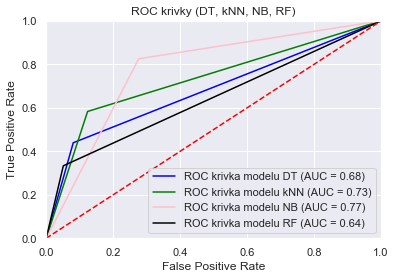

In [11]:
#ROC krivky a AUC koeficienty
from sklearn.metrics import roc_curve,auc

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_knn, pos_label=1) 
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt, pos_label=1) 
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_nb, pos_label=1) 
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf, pos_label=1)

roc_auc_knn = auc(fpr_knn, tpr_knn) 
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.title('ROC krivky (DT, kNN, NB, RF)')

plt.plot(fpr_dt, tpr_dt, color='blue', label = 'ROC krivka modelu DT (AUC = %0.2f)' % roc_auc_dt) 
plt.plot(fpr_knn, tpr_knn, color='green', label = 'ROC krivka modelu kNN (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_nb, tpr_nb, color='pink', label = 'ROC krivka modelu NB (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color='black', label = 'ROC krivka modelu RF (AUC = %0.2f)' % roc_auc_rf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')
plt.show() 

In [ ]:
#Z tohto porovnania nam vychadza najlepsie model Naive Bayes (AUC=0,77)

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

#Strom (s najlepsimi parametrami)
print("Rozhodovacie stromy:")
print(f"Accuracy: {accuracy_score(y_test, y_dt)}")
print(f"Precision: {precision_score(y_test, y_dt)}")
print(f"Recall: {recall_score(y_test, y_dt)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_dt)  
print(cm)

#kNN (s najlepsim parametrom)
print("kNN model:")
print(f"Accuracy: {accuracy_score(y_test, y_knn)}")
print(f"Precision: {precision_score(y_test, y_knn)}")
print(f"Recall: {recall_score(y_test, y_knn)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_knn)  
print(cm)

#Naive Bayes (nema parametre)
print("Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_nb)}")
print(f"Precision: {precision_score(y_test, y_nb)}")
print(f"Recall: {recall_score(y_test, y_nb)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_nb)  
print(cm)

#Random Forest
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_rf)}")
print(f"Precision: {precision_score(y_test, y_rf)}")
print(f"Recall: {recall_score(y_test, y_rf)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Rozhodovacie stromy:
Accuracy: 0.7993374349266446
Precision: 0.6444444444444445
Recall: 0.4393939393939394
Confusion matrix:
[[1457  128]
 [ 296  232]]
kNN model:
Accuracy: 0.8031235210601041
Precision: 0.6111111111111112
Recall: 0.5833333333333334
Confusion matrix:
[[1389  196]
 [ 220  308]]
Naive Bayes:
Accuracy: 0.7491717936583058
Precision: 0.4988558352402746
Recall: 0.8257575757575758
Confusion matrix:
[[1147  438]
 [  92  436]]
Random Forest:
Accuracy: 0.7950780880265026
Precision: 0.6848249027237354
Recall: 0.3333333333333333
Confusion matrix:
[[1504   81]
 [ 352  176]]


In [ ]:
#Z tohto porovnania vychadza na zaklade Accuracy najlepsie model kNN 
#Na zaklade Confusion Matrix vychadza o malicko lepsie model vyuzivajuci rozhodovacie stromy

In [13]:
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.26568734499177155, 'Contract'),
 (0.17051003345217117, 'Tenure_ordinal'),
 (0.11238342835216533, 'InternetService'),
 (0.09385554025615624, 'PaymentMethod_Electronic check'),
 (0.06644100732503355, 'OnlineSecurity'),
 (0.058274517475719136, 'TechSupport'),
 (0.055656113344717734, 'TotalCharges_ordinal'),
 (0.03545936306550963, 'OnlineBackup'),
 (0.03278110213221325, 'StreamingTV'),
 (0.031412511991837276, 'DeviceProtection'),
 (0.026863076282511857, 'StreamingMovies'),
 (0.018084869752381893, 'MonthlyCharges_ordinal'),
 (0.006858949653731379, 'PaperlessBilling'),
 (0.004845944589856438, 'Partner'),
 (0.004805004567225905, 'SeniorCitizen'),
 (0.0047925070896760544, 'Dependents'),
 (0.0035049125221084756, 'TotalRatio'),
 (0.003315587853111344, 'PaymentMethod_Credit card (automatic)'),
 (0.0018509945673817357, 'PaymentMethod_Bank transfer (automatic)'),
 (0.0012683996730739645, 'MultipleLines'),
 (0.0012667574807157492, 'PaymentMethod_Mailed check'),
 (8.203358093019344e-05, 'Gender')

In [ ]:
#Na zaklade Random Forest modelu vidiet tri najdolezistejsie atributy: 
#Contract, Tenure_ordinal a InternetService

In [14]:
#Vizualizacia rozhodovacich stromov pomocou http://www.webgraphviz.com/:
from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_telco_data.columns.values, class_names=['0','1'], out_file=f)

In [ ]:
#Na zaklade stromu vidno, ze o odchode zakaznika rozhoduju 3 najdolezitejsie parametre:
#Contract (typu 0, t.j. Month-to-Month)
#InternetService (typu 0, t.j. bez internetu, resp. typu 1, t.j. DSL)
#Tenure_ordinal (typu 0, t.j. newbie, resp. typu  1, t.j. recent)
#Z toho mozno odvodit, ze najvyssie riziko odchodu je u zakaznikov, ktori nemaju internet alebo pouzivaju
#DSL pripojenie, maju kontrakt uzavrety z mesiaca na mesiaca (Month-to-Month) a su u operatora ešte len 
#velmi kratko (príp. kratko), teda len niekolko mesiacov

In [15]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names): 

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)
    
tree_to_code(dt, X_telco_data.columns.values)

def tree(Gender, SeniorCitizen, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, MonthlyCharges_ordinal, TotalCharges_ordinal, Tenure_ordinal, TotalRatio, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check):
  if Contract <= 0.5:
    if InternetService <= 1.5:
      if Tenure_ordinal <= 0.5:
        return [[337. 234.]]
      else:  # if Tenure_ordinal > 0.5
        return [[537. 120.]]
    else:  # if InternetService > 1.5
      if Tenure_ordinal <= 1.5:
        return [[281. 569.]]
      else:  # if Tenure_ordinal > 1.5
        return [[396. 254.]]
  else:  # if Contract > 0.5
    if InternetService <= 1.5:
      if Contract <= 1.5:
        return [[600.  52.]]
      else:  # if Contract > 1.5
        return [[862.  11.]]
    else:  # if InternetService > 1.5
      if Contract

In [ ]:
#Na zaklade zisteni z rozhodovacieho stromu urobime pokus - vyskusame natrenovat a otestovat modely
#len s uvedenymi atritutmi Contract, InternetService a Tenure_ordinal

In [1]:
#Ehm, aj tu som zacinala riesenie nanovo pri "tuningu", preto som importovala moduly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

telco_data = pd.read_csv("../data/telco_data_processed.csv")
telco_data = telco_data[["Contract", "InternetService", "Tenure_ordinal","Churn"]]
telco_data.head() 

,Contract,InternetService,Tenure_ordinal,Churn
0,0,1,0,0
1,1,1,2,0
2,0,1,0,1
3,1,1,3,0
4,0,2,0,1


In [2]:
from sklearn.model_selection import train_test_split 

print("Redukovana mnozina:")
X_telco_data = telco_data.drop('Churn', axis=1) 
print(X_telco_data.shape)
y_telco_data = telco_data['Churn'] 
print(y_telco_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_telco_data, y_telco_data, test_size=0.3, random_state=1) 
print("Trenovacia mnozina:")
print(X_train.shape)
print(y_train.shape)
print("Testovacia mnozina:")
print(X_test.shape)
print(y_test.shape)

Redukovana mnozina:
(7043, 3)
(7043,)
Trenovacia mnozina:
(4930, 3)
(4930,)
Testovacia mnozina:
(2113, 3)
(2113,)


In [3]:
#Trenovanie
#Stromy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV 

criterion_range = ['gini', 'entropy'] 
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
min_samples_split_range = [2, 4, 8, 10] 
min_samples_leaf_range = [1, 5, 10, 15] 
presort_range = [True, False] 

param_grid_dt = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )

dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')  
grid_dt.fit(X_train, y_train) 

print("Najlepsia kombinacia parametrov:")
print(grid_dt.best_params_)
print()
print("Hodnota presnosti modelu pri tejto kombinacii:")
print(grid_dt.best_score_)

Najlepsia kombinacia parametrov:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'presort': True}

Hodnota presnosti modelu pri tejto kombinacii:
0.7864097363083165


In [4]:
#kNN
from sklearn.neighbors import KNeighborsClassifier 

k_range = list(range(1, 100))
param_grid_knn = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy') 
grid_knn.fit(X_train, y_train)
print("Najlepsie parametre:")
print(grid_knn.best_params_)
print("Hodnota presnosti modelu pre tieto parametre:")
print(grid_knn.best_score_)

Najlepsie parametre:
{'n_neighbors': 61}
Hodnota presnosti modelu pre tieto parametre:
0.7843813387423935


In [5]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [6]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=1000, max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

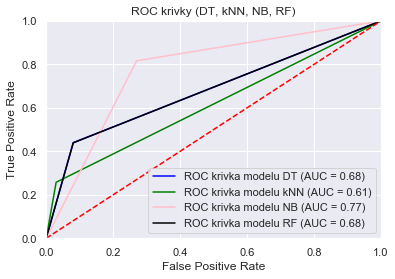

In [7]:
#Testovanie modelov:
#Strom (s najlepsimi parametrami)
dt = DecisionTreeClassifier(max_depth=3,criterion= 'gini',min_samples_leaf= 1, min_samples_split= 2, presort= True)   
dt.fit(X_train, y_train)       
y_dt = dt.predict(X_test) 

#kNN (s najlepsim parametrom)
knn = KNeighborsClassifier(n_neighbors=61)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test) 

#Naive Bayes 
y_nb=nb.predict(X_test)

#Random Forest 
y_rf=rf.predict(X_test)

#ROC krivky a AUC koeficienty
from sklearn.metrics import roc_curve,auc

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_knn, pos_label=1) 
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt, pos_label=1) 
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_nb, pos_label=1) 
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf, pos_label=1)

roc_auc_knn = auc(fpr_knn, tpr_knn) 
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.title('ROC krivky (DT, kNN, NB, RF)')

plt.plot(fpr_dt, tpr_dt, color='blue', label = 'ROC krivka modelu DT (AUC = %0.2f)' % roc_auc_dt) 
plt.plot(fpr_knn, tpr_knn, color='green', label = 'ROC krivka modelu kNN (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_nb, tpr_nb, color='pink', label = 'ROC krivka modelu NB (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color='black', label = 'ROC krivka modelu RF (AUC = %0.2f)' % roc_auc_rf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')
plt.show() 


In [ ]:
#Nakolko sme z modelu Random Forest ziskali parametre identicke s parametrami najlepsieho rozhodovacieho stromu
#(cez GridSearch), tieto dve ROC krivky sa prekryvaju

In [8]:
#Vyhodnotenie na testovacej množine:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

#Strom (s najlepsimi parametrami)
print("Rozhodovacie stromy:")
print(f"Accuracy: {accuracy_score(y_test, y_dt)}")
print(f"Precision: {precision_score(y_test, y_dt)}")
print(f"Recall: {recall_score(y_test, y_dt)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_dt)  
print(cm)

#kNN (s najlepsim parametrom)
print("kNN model:")
print(f"Accuracy: {accuracy_score(y_test, y_knn)}")
print(f"Precision: {precision_score(y_test, y_knn)}")
print(f"Recall: {recall_score(y_test, y_knn)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_knn)  
print(cm)

#Naive Bayes (nema parametre)
print("Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_nb)}")
print(f"Precision: {precision_score(y_test, y_nb)}")
print(f"Recall: {recall_score(y_test, y_nb)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_nb)  
print(cm)

#Random Forest
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_rf)}")
print(f"Precision: {precision_score(y_test, y_rf)}")
print(f"Recall: {recall_score(y_test, y_rf)}")
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Rozhodovacie stromy:
Accuracy: 0.7993374349266446
Precision: 0.6444444444444445
Recall: 0.4393939393939394
Confusion matrix:
[[1457  128]
 [ 296  232]]
kNN model:
Accuracy: 0.792238523426408
Precision: 0.7431693989071039
Recall: 0.25757575757575757
Confusion matrix:
[[1538   47]
 [ 392  136]]
Naive Bayes:
Accuracy: 0.751538097491718
Precision: 0.5017462165308498
Recall: 0.8162878787878788
Confusion matrix:
[[1157  428]
 [  97  431]]
Random Forest:
Accuracy: 0.7993374349266446
Precision: 0.6444444444444445
Recall: 0.4393939393939394
Confusion matrix:
[[1457  128]
 [ 296  232]]


In [ ]:
#Vidime, ze po redukcii atributov sa model kNN mierne zhorsil, zatialco Naive Bayes sa zlepsil

In [9]:
#A na zaver vizualizacia rozhodovacich stromov pomocou http://www.webgraphviz.com/:
from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_telco_data.columns.values, class_names=['0','1'], out_file=f)

In [ ]:
#Parada! Hotovo. :)